In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn import gaussian_process
from sklearn.gaussian_process import kernels

# Gaussian Processes: Part 1

## Exercise 8.1: Sample from GP prior

In this exercises we will write the code needed to draw and plot samples of $f$ from a Gaussian process prior with squared exponential (or, equivalently, RBF) kernel

$$
f \sim \mathcal{GP}(m, \kappa), \qquad m(x) = 0 \text{ and } \kappa(x, x') = \sigma^2_f \exp{\Big(−\frac{1}{2l^2} {\|x - x'\|}^2\Big)}.
$$

To implement this, we choose a vector of $m$ test input points $\mathbf{x}_*$.
We will choose $\mathbf{x}_*$ to contain sufficiently many points, such that it will *appear* as a continuous line on the screen.
We then evaluate the $m \times m$ covariance matrix $\kappa(\mathbf{x}_∗, \mathbf{x}_∗)$ and thereafter generate samples from the multivariate normal distribution

$$
f(\mathbf{x}_∗) \sim \mathcal{N}\big(m(\mathbf{x}_∗), \kappa(\mathbf{x}_∗, \mathbf{x}_∗)\big).
$$

### (a)

Use `np.linspace` to construct a vector $\mathbf{x}_*$ with $m = 101$ elements equally spaced from -5 to 5.

In [2]:
xs = np.linspace(-5, 5, 101)

### (b)

Construct a mean vector $m(\mathbf{x}_∗)$ with 101 elements all equal to zero and the $101 \times 101$ covariance matrix $\kappa(\mathbf{x}_*, \mathbf{x}_∗)$.
The expression for $\kappa(\cdot, \cdot)$ is given above.
Let the hyperparameters be $\ell^2 = 2$ and $\sigma^2_f = 1$.

In [3]:
mean = np.zeros(101)
cov = np.exp(-1/(2*np.sqrt(2)**2) * np.abs(xs[:,None] - xs[None,:])**2)

### (c)

Use `stats.multivariate_normal` from `scipy` (you might need to use the option `allow_singular=True`) to draw 25 samples $f^{(1)}(\mathbf{x}_*), \ldots, f^{(25)}(\mathbf{x}_*)$ from the multivariate normal distribution $f(\mathbf{x}_∗) \sim \mathcal{N}\big(m(\mathbf{x}_*), \kappa(\mathbf{x}_*, \mathbf{x}_*)\big)$.

In [4]:
samples = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=25)

### (d)

Plot the samples $f^{(1)}(\mathbf{x}_∗), \ldots, f^{(25)}(\mathbf{x}_∗)$ versus the input vector $\mathbf{x}_*$.

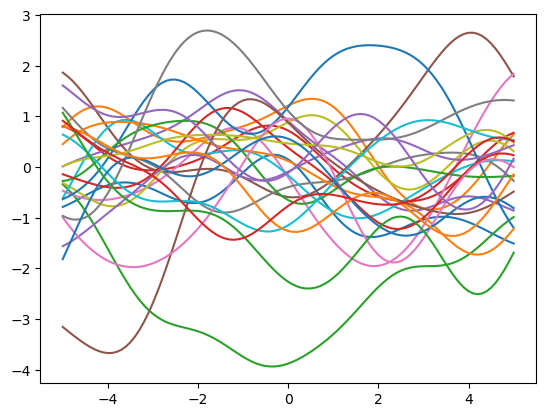

In [5]:
plt.plot(xs, samples.T)
plt.show()

### (e)

Try another value of $\ell$ and repeat (b)-(d). How do the two plots differ, and why?

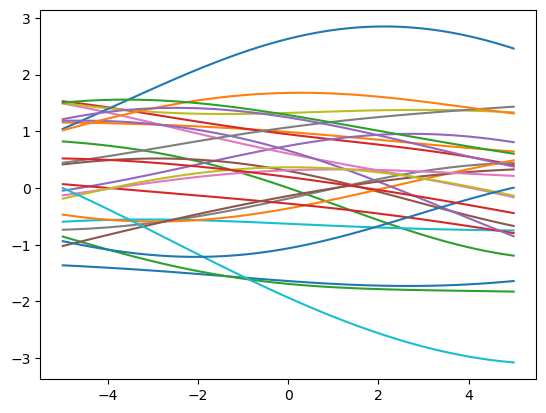

In [6]:
mean = np.zeros(101)
cov = np.exp(-1/(2*np.sqrt(50)**2) * np.abs(xs[:,None] - xs[None,:])**2)
samples = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=25)
plt.plot(xs, samples.T)
plt.show()

## Exercise 8.2: GP posterior I

In this exercise we will perform Gaussian process regression.
That means, based on the $n$ observations $\mathcal{D} = \{x_i, f(x_i)\}^n_{i=1}$ and the prior belief $f \sim \mathcal{GP}\big(0, \kappa(x, x')\big)$, we want to find the posterior $p(f | \mathcal{D})$.
(In the previous problem, we were only concerned with the prior $p(f)$, not conditioned on having observed the data $\mathcal{D}$.)
We consider the same Gaussian process prior (same mean $m(x)$ and $\kappa(x, x')$ and hyperparameters) as in the previous exercise.

### (a)

Construct two vectors $\mathbf{x} = [-4, -3, -1, 0, 2]^\mathsf{T}$ and $\mathbf{y} = [-2, 0, 1, 2, -1]^\mathsf{T}$, which will be our training data (that is, $n = 5$).

In [7]:
x = np.array([-4,-3,-1,0,2])
y = np.array([-2,0,1,2,-1])

### (b)

Keep $\mathbf{x}_∗$ as in the previous problem. In addition to the $m \times m$ matrix $\kappa(\mathbf{x}_∗, \mathbf{x}_∗)$, now also compute the $n \times m$ matrix $\kappa(\mathbf{x}, \mathbf{x}_∗)$ and the $n \times n$ matrix $\kappa(\mathbf{x}, \mathbf{x})$.

*Hint:* You might find it useful to define a function that returns $\kappa(x, x')$, taking $x$ and $x'$ as arguments.

In [18]:
def makeCov(x1, x2):
    return np.exp(-1/(2*np.sqrt(2)**2) * np.abs(x1[:,None] - x2[None,:])**2)

xxs = makeCov(x, xs)
xx = makeCov(x, x)
xsxs = makeCov(xs, xs)

### (c)

Use the training data $\mathbf{x}$, $\mathbf{y}$ and the matrices constructed in (b) to compute the posterior mean $\boldsymbol{\mu}_{\mathrm{posterior}}$ and the posterior covariance $\mathbf{K}_{\mathrm{posterior}}$ for $\mathbf{x}_∗$, by using the equations for conditional multivariate normal distribution.

$$
E[f_{1:s} \mid y_{1:n}] = m_{1:s}^* + C(x_{1:s}^*,x_{1:n}) \left( C(x_{1:n},x_{1:n}) + \Xi I_n) \right)^{-1}(y_{1:n} - m_{1:n}),
$$
$$
Cov[f_{1:s}^* \mid y_{1:n}] = C(x_{1:s}^*, x_{1:s}^*) - C(x_{1:s}^*, x_{1:n}) \left( C(x_{1:n}, x_{1:n} + \Xi I_n) \right)^{-1} C(x_{1:n},x_{1:s}^*).
$$

In [19]:
C_c = nm.T @ np.linalg.inv(nn)
mu_post = C_c @ y
K_post = xsxs - (C_c @ nm)

### (d)

In a similar manner as in (c) and (d) in the previous problem, draw 25 samples from the multivariate distribution $f(\mathbf{x}_∗) \sim \mathcal{N}(\boldsymbol{\mu}_{\mathrm{posterior}}, \mathbf{K}_{\mathrm{posterior}})$ and plot these samples ($f^{(j)} (\mathbf{x}_∗)$ vs. $\mathbf{x}_∗$) together with the posterior mean ($\boldsymbol{\mu}_{\mathrm{posterior}}$ vs. $\mathbf{x}_∗$) and the actual measurements ($\mathbf{f}$ vs. $\mathbf{x}$).
How do the samples in this plot differ from the prior samples in the previous problem?

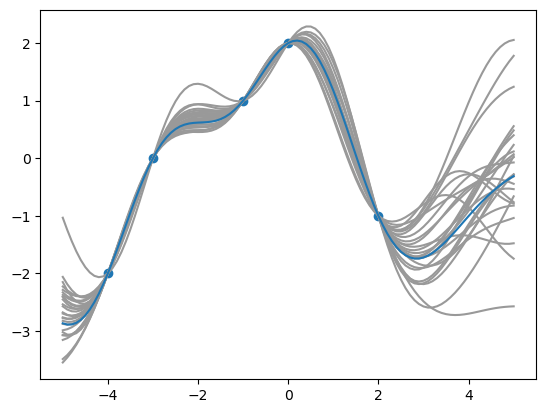

In [22]:
samples = stats.multivariate_normal.rvs(mu_post, K_post, 25)
plt.plot(xs, samples.T, color='0.6')
plt.plot(xs, mu_post)
plt.scatter(x,y)
plt.show()

### (e)

Instead of plotting samples, plot a credibility region.
Here, a credibility region is based on the (marginal) posterior variance.
The 68% credibility region, for example, is the area between $\boldsymbol{\mu}_{\mathrm{posterior}} - \sqrt{\mathbf{K}^d_{\mathrm{posterior}}}$ and $\boldsymbol{\mu}_{\mathrm{posterior}} + \sqrt{\mathbf{K}^d_{\mathrm{posterior}}}$, where $\mathbf{K}^d_{\mathrm{posterior}}$ is a vector with the diagonal elements of $\mathbf{K}_{\mathrm{posterior}}$.
What is the connection between the credibility regions and the samples you drew previously?

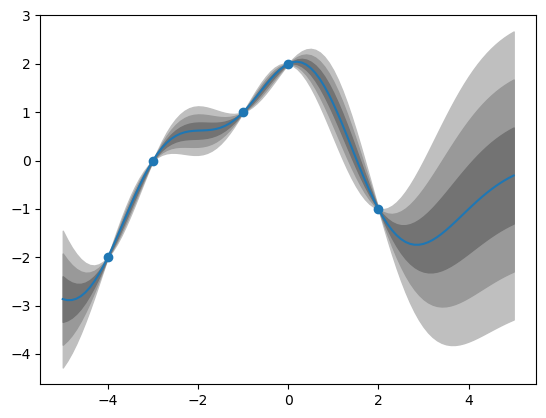

In [49]:
plt.plot(xs, mu_post)
for i in range(3,0,-1):
    plt.fill_between(
        xs, 
        mu_post + i*np.sqrt(np.diag(K_post)), 
        mu_post - i*np.sqrt(np.diag(K_post)),
        color=str(0.3 + 0.15*i)
    )
plt.scatter(x,y)
plt.show()

### (f)

Now, consider the setting where the measurements are corrupted with noise, $y_i = f(\mathbf{x}_i) + \varepsilon$, $\varepsilon \sim \mathcal{N}(0, \sigma^2)$.
Use $\sigma^2 = 0.1$ and repeat (c)-(e) with this modification of the model.
What is the difference in comparison to the previous plot?
What is the interpretation?

$$
E[f_{1:s} \mid y_{1:n}] = m_{1:s}^* + C(x_{1:s}^*,x_{1:n}) \left( C(x_{1:n},x_{1:n}) + \Xi I_n) \right)^{-1}(y_{1:n} - m_{1:n}),
$$
$$
Cov[f_{1:s}^* \mid y_{1:n}] = C(x_{1:s}^*, x_{1:s}^*) - C(x_{1:s}^*, x_{1:n}) \left( C(x_{1:n}, x_{1:n} + \Xi I_n) \right)^{-1} C(x_{1:n},x_{1:s}^*).
$$

In [ ]:
xx = 

### (g)

Explore what happens with another length scale $\ell$.

## Exercise 8.3: Other covariance functions/kernels

The squared exponential kernel/covariance function gives samples which are smooth and infinitely continuously differentiable.
Other kernels make other assumptions.
Now try the previous problems using the exponential kernel,

$$
\kappa(x, x') = \sigma^2_f \exp{\bigg(-\frac{1}{l} \|x - x' \|\bigg)},
$$

and the Matérn kernel with parameter $\nu = 3/2$,

$$
\kappa(x, x') = \sigma^2_f \bigg(1 + \frac{\sqrt{3}}{l} \|x - x' \|\bigg) \exp{\bigg(-\frac{\sqrt{3}}{l} \|x - x' \|\bigg)}.
$$

## Exercise 8.4: GP posterior II

Repeat Exercise 8.2 using `GaussianProcessRegressor` from `sklearn.gaussian_process`, only plotting the credibility regions based on the posterior predictive variance (not drawing samples).

Some useful hints:

- As all supervised machine learning methods in `sklearn`, you first have to construct an object from the model class (in this case `GaussianProcessRegressor`), and thereafter train it on data by using its member function `fit()`.
  To obtain predictions, use the member function `predict()`.
  To the latter, you will either have to pass `return_std=True` or `return_cov=True` in order to obtain information about the posterior predictive variance.
- When you construct the model, you have to define a kernel.
  The kernels are available in `sklearn.gaussian_process.kernel`, where the squared exponential/RBF kernel is available as `RBF`.
- The function `fit()` automatically optimizes the hyperparameters.
  To turn that feature off, you have to pass the argument `optimizer=None` to `GaussianProcessRegressor`.
- To include the measurement noise, you can formulate it as part of the kernel by using the kernel `WhiteKernel`.